In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [9]:
class Canvas:
    def __init__(self,
                 width=600, 
                 height=600):
        self.width = width
        self.height = height
        
        self.img = np.zeros((width,height,3), dtype = np.uint8) + 255
        
    def putpixel(self, x, y, color,line_width):
        x = self.width/2 + x
        y = self.height/2 - y -1
        if (x< 0 or x >= self.width or y < 0 or y >= self.height):
            return 
        R = int(color[0])
        G = int(color[1])
        B = int(color[2])
        cv2.line(self.img, (int(x), int(y)), (int(x), int(y)), (R,G,B),line_width)
        
    def draw_line(self, p0, p1, color, line_width):
        if p0[0] > p1[0]:
            p0, p1 = p1, p0
            
        a = (p1[1] - p0[1]) / (p1[0] - p0[0])
        y = p0[1]
        for x in range(p0[0], p1[0]+1,1):
            self.putpixel(x,y,color,line_width)
            y = y + a
        
        plt.imshow(self.img)
        
        return 

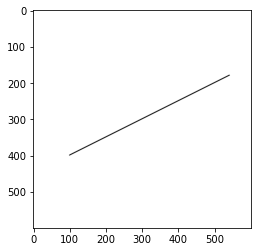

In [10]:
canvas = Canvas(600,600)
canvas.draw_line((-200,-100),(240,120),(0,0,0),2)

<img src = "https://gabrielgambetta.com/computer-graphics-from-scratch/images/raster-01b.png" width="40%">

위의 선이 들쭉날쭉 한 이유는 정수 좌표에만 픽셀을 그릴 수 있고, 수학적인 선은 실제로 폭이 0이기 때문이다.    
우리가 그리고 있는 것은 이상적인 선의 근사치이다.    

선의 근사치를 더 아름답게 그릴 수 있는 방법들이 있다.     

`MSAA(MultiSampling Anti Aliasing)` : 멀티 샘플링 안티 엘리어싱이다. 폴리곤의 가장자리가 지나가는 부분만 표본화를 거치고 AA를 진행한다. 엘리어싱은 주로 가장자리에서 발생하고, 폴리곤 그래픽은 가장자리를 알 수 있기 때문에 가장자리 부분만 표본화 해 픽셀을 계산하여 적용한다.    

`FXAA(Fast approximate anti-aliasing)` : NVIDIA 에서 사용하는 AA 기법. 


`SSAA(Supersampling anti-aliasing)` : 고해상도로 이미지를 만든 다음 박스 필터로 AA를 진행하고 다운샘플링 한다.    
> (256,256) 의 이미지에 1.2 픽셀 굵기의 선이 있으면, 선의 두께를 4.8픽셀로 키우고, (1024,1024)의 스크린으로 해상도를 높인다. 그 다음 (4,4) 픽셀의 필터를 적용해 축소된 (256,256) 이미지를 얻는다. 

`TAA(Temporal anti-aliasing)` : 과거 프레임과 현재 프레임의 정보를 결합하여 현재 프레임에서 AA를 진행한다.   


위와 같은 기법을 사용하지 않는 이유는 속도가 너무 느리고, 우리의 목표는 예쁜 선을 그리는 것이 아니라 3D 장면을 렌더링하기 위한 기초 알고리즘을 개발하는 것이기 때문이다. 

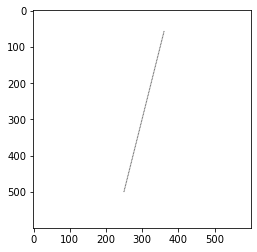

In [7]:
canvas = Canvas(600,600)
canvas.draw_line((-50,-200),(60,240),(0,0,0),2)

<img src = "https://gabrielgambetta.com/computer-graphics-from-scratch/images/raster-01d.png" width="40%">

x에 대응되는 하나의 y값만을 계산하여 색칠하기 때문에 위와 같은 결과가 나타난다. 